<a href="https://colab.research.google.com/github/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/blob/JATAN_202218061/DM_PROJECT_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

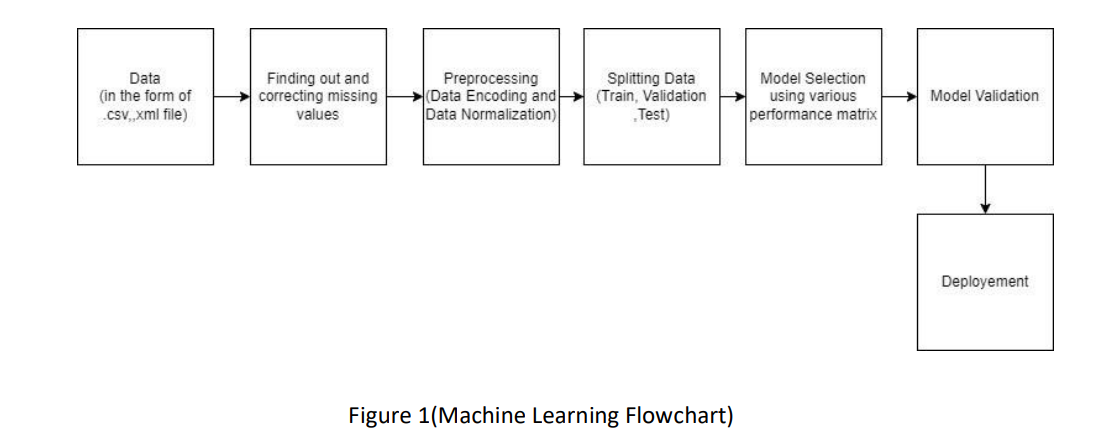

#DATA

#1. Importing libraries

In [5]:
import pandas as pd
# import polars as p
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")

#2. Importing data

In [40]:
data = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/main/dataset.csv")

In [41]:
# Previewing data
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


#3. Data Understanding

**DATASET DESCRIPTION**


YearStart  -  Year start

YearEnd	-  Year End (for single-year indicator, year end=year start)

LocationAbbr	- Location abbreviation

LocationDesc	- Location description

Datasource	- Name or abbreviation of Data Source

Class	- Class Description

Topic	- Topic Description

Question	- Question Description

Data_Value_Unit	- Description of unit e.g. %, etc

Data_Value_Type	- Description of type of data e.g. Value, Percentage, Number

Data_Value	- Data value (percentage, text)

Data_Value_Alt	- Numeric representation of data value

Data_Value_Footnote_Symbol	- Symbol that would be used to flag footnotes

Data_Value_Footnote	- Footnote text

Low_Confidence_Limit	- Low 95% Confidence Interval value

High_Confidence_Limit	- High 95% Confidence Interval value

Sample_Size	- Sample Size

Total	- Total/Overall breakout category

Age(years)	- Age (years) breakout category

Education	- Education breakout category

Gender	- Gender breakout category

Income	- Income breakout category

Race/Ethnicity	- Race/Ethnicity breakout category

GeoLocation	- Latitude & Longitude to be provided for formatting GeoLocation or Geocode in the format (latitude, longitude)

ClassID	- Lookup identifier value for Class

TopicID	- Lookup identifier value for Topic

QuestionID	- Lookup identifier value for Question

DataValueTypeID	- Lookup identifier value for Data_Value_type

LocationID	- Lookup identifier value for Location

StratificationCategory1	- Lookup Identification value, such as Age Group, Gender

Stratification1	- Data stratified by this value, such as Male, Female, Total

StratificationCategoryId1  - Lookup identifier value for Stratification1

StratificationID1	- Lookup identifier value for StratificationCategory1


##1.Creating a function to be able to lower all letters in columns

In [42]:
data.columns = data.columns.str.lower()
data.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,data_value_type,...,geolocation,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yearstart                   53392 non-null  int64  
 1   yearend                     53392 non-null  int64  
 2   locationabbr                53392 non-null  object 
 3   locationdesc                53392 non-null  object 
 4   datasource                  53392 non-null  object 
 5   class                       53392 non-null  object 
 6   topic                       53392 non-null  object 
 7   question                    53392 non-null  object 
 8   data_value_unit             0 non-null      float64
 9   data_value_type             53392 non-null  object 
 10  data_value                  48346 non-null  float64
 11  data_value_alt              48346 non-null  float64
 12  data_value_footnote_symbol  5046 non-null   object 
 13  data_value_footnote         504

#Total columns

In [44]:
columns = data.columns
columns

Index(['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'class', 'topic', 'question', 'data_value_unit', 'data_value_type',
       'data_value', 'data_value_alt', 'data_value_footnote_symbol',
       'data_value_footnote', 'low_confidence_limit', 'high_confidence_limit ',
       'sample_size', 'total', 'age(years)', 'education', 'gender', 'income',
       'race/ethnicity', 'geolocation', 'classid', 'topicid', 'questionid',
       'datavaluetypeid', 'locationid', 'stratificationcategory1',
       'stratification1', 'stratificationcategoryid1', 'stratificationid1'],
      dtype='object')

###Looking at the above dataset our target variable is the column "Data_Value"


#Size of dataset

In [45]:
data.shape

(53392, 33)

#4.Looking for Null values

In [46]:
print(data.isnull().sum())

yearstart                         0
yearend                           0
locationabbr                      0
locationdesc                      0
datasource                        0
class                             0
topic                             0
question                          0
data_value_unit               53392
data_value_type                   0
data_value                     5046
data_value_alt                 5046
data_value_footnote_symbol    48346
data_value_footnote           48346
low_confidence_limit           5046
high_confidence_limit          5046
sample_size                    5046
total                         51485
age(years)                    41954
education                     45764
gender                        49578
income                        40043
race/ethnicity                38136
geolocation                    1008
classid                           0
topicid                           0
questionid                        0
datavaluetypeid             

###4.2checking for any high percentage of missing value in columns


In [47]:
missing_percentage = data.isnull().sum() * 100 / len(data)
missing_percentage


yearstart                       0.000000
yearend                         0.000000
locationabbr                    0.000000
locationdesc                    0.000000
datasource                      0.000000
class                           0.000000
topic                           0.000000
question                        0.000000
data_value_unit               100.000000
data_value_type                 0.000000
data_value                      9.450854
data_value_alt                  9.450854
data_value_footnote_symbol     90.549146
data_value_footnote            90.549146
low_confidence_limit            9.450854
high_confidence_limit           9.450854
sample_size                     9.450854
total                          96.428304
age(years)                     78.577315
education                      85.713215
gender                         92.856608
income                         74.998127
race/ethnicity                 71.426431
geolocation                     1.887923
classid         

In [48]:
missing_percentage.index[8]

'data_value_unit'

###There are many missing or null values in the dataset

##4.3Dropping Attributes with high volume(>90%) of missing values

In [49]:
print("Droped columns are")
for i in range(len(missing_percentage)):
  if  missing_percentage[i] >90:
    print(missing_percentage.index[i])
    data = data.drop([missing_percentage.index[i]],1)

Droped columns are
data_value_unit
data_value_footnote_symbol
data_value_footnote
total
education
gender


##4.4Removing Unnecessary columns (NUMERICAL)

In [50]:
import seaborn as sns

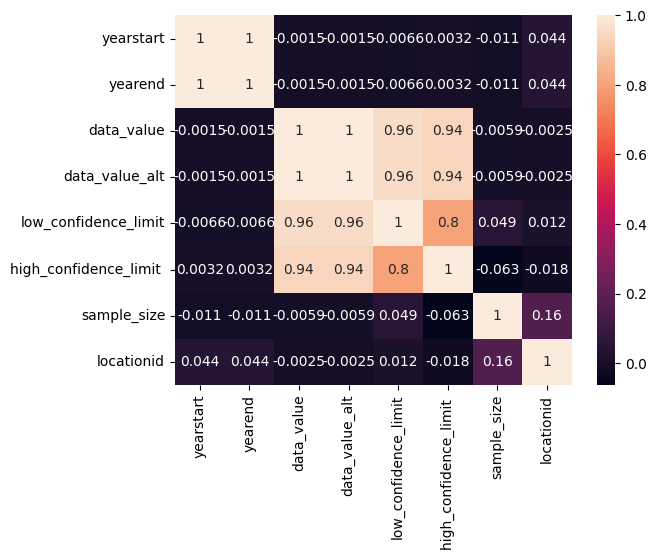

In [51]:
ax = sns.heatmap(data.corr(), annot=True)

##-->From the heat map we found that None of the numerical data will help us to predict data_value.

In [52]:
unnecessary_col_num = data.loc[:,['low_confidence_limit', 'high_confidence_limit ','yearstart','data_value_alt','sample_size']]
unnecessary_col_num.head()

,low_confidence_limit,high_confidence_limit,yearstart,data_value_alt,sample_size
0,30.5,33.5,2011,32.0,7304.0
1,29.9,34.7,2011,32.3,2581.0
2,30.0,33.6,2011,31.8,4723.0
3,29.9,37.6,2011,33.6,1153.0
4,30.2,35.6,2011,32.8,2402.0


In [53]:
# unnecessary_col = data.loc[:,['low_confidence_limit', 'high_confidence_limit ', 'data_value_alt', 'yearend', 'topic', 'class', 'datasource', 'questionid', 'classid', 'topicid', 'datavaluetypeid', 'data_value_type', 'stratificationcategoryid1', 'stratificationid1', 'geolocation', 'question', 'stratificationcategory1', 'stratification1']]
# unnecessary_col.head()

#WHY WE REMOVED THESE VALUES

->'Low_Confidence_Limit' => It is the lowest range of our target variable. Closer to Data_value.

-->'High_Confidence_Limit' => It is the highest range of our target variable. Closer to Data_value.

-->'Data_Value_Alt' => Closer to Data_value.

-->'YearEnd' => We have taken starting year. We will take either 'Yearstart' or 'Yearend. Otherwise predator will correlated.

Most of the variables are not relevant to the target variables

In [54]:
# unnecessary_col.columns
for i in unnecessary_col_num.columns:
  data = data.drop([i],1)

##4.5 Removing Unnecessary columns (CATEGORICAL)

##4.5.1 Implementing one-hot encoding through category_encoder




In [23]:
pip install category-encoders

In [24]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical = data[categorical_columns]

In [25]:

# Import label encoder
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [26]:
for i in categorical:

    # Specify the column name for encoding
    column_to_encode = i

    # Fit and transform the selected column
    data[column_to_encode] = label_encoder.fit_transform(data[column_to_encode])


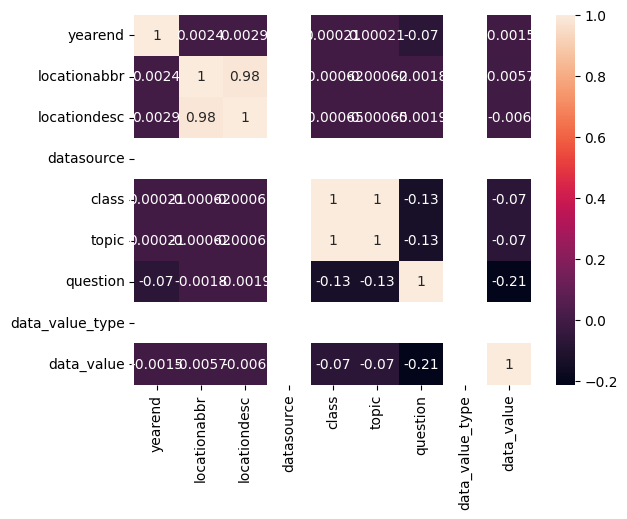

In [30]:
ax = sns.heatmap(data.iloc[:,:9].corr(), annot=True)

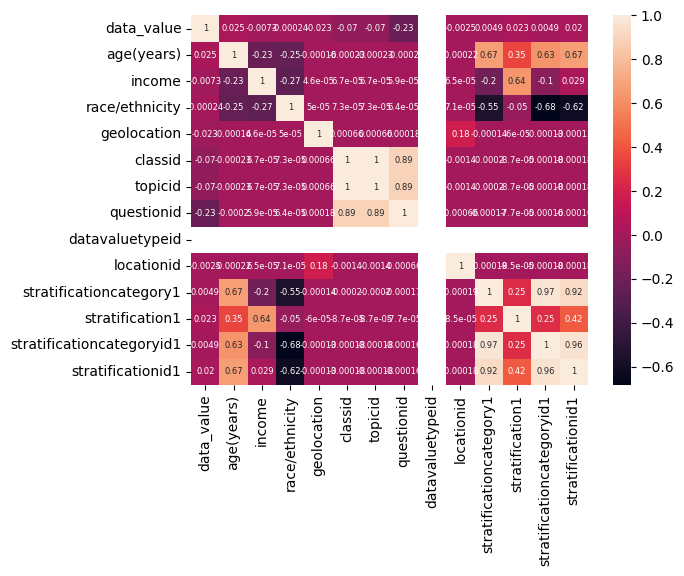

In [37]:
ax = sns.heatmap(data.iloc[:,8:].corr(), annot=True, annot_kws={"size": 6})

#From data we obsearve that none of the variables are correlated with our target variable so we will explore Vairable "QUESTION" further for deeper understanding of dataset.

In [64]:
len(data['question'].unique())

9

In [65]:
data['question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

##We have to explore each questions and predict obecity for each variable.

In [270]:
df = data.copy()

# Drop rows with null values
df.dropna(subset=['income'], inplace=True)

In [278]:
df['income'].isna().sum()

13349

In [275]:
# #income
# in_map = {'less than $15,000':0, '$15,000 - $24,999':1, '$25,000 - $34,999':2,'$35,000 - $49,999':3, '$50,000 - $74,999':4,
#           '$75,000 or greater':5, 'data not reported':6}
# in_map
# df['income'] = df['income'].map(in_map)

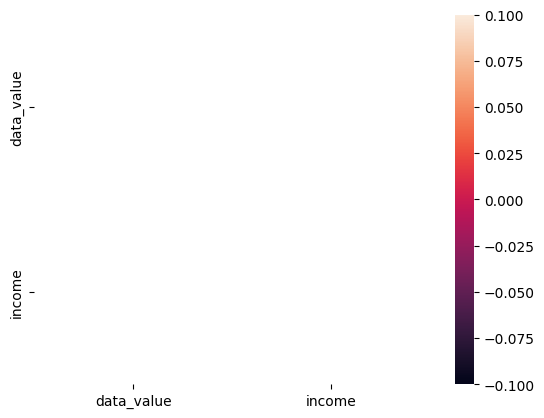

In [250]:
ax = sns.heatmap(df.corr(), annot=True)

In [ ]:
# pip install category-encoders

In [245]:
# categorical_columns = data.select_dtypes(include=['object']).columns
# categorical = data[categorical_columns]

In [ ]:
# import pandas as pd
# from scipy.stats import chi2_contingency

# for i in categorical.columns:
#   contingency_table = pd.crosstab(data[i], data['data_value'])
#   # Perform the chi-squared test
#   chi2, p, _, _ = chi2_contingency(contingency_table)
#   # Check the p-value
#   alpha = 0.05  # Set your significance level
#   if p < alpha:
#       print(f"The {i} variable is  dependent with data_value, reject null hypothesis")
#   else:
#       print(f"The {i} variable is  independent with  data_value")



##If the p-value is less than your chosen significance level (alpha), you can conclude that the two variables are dependent.

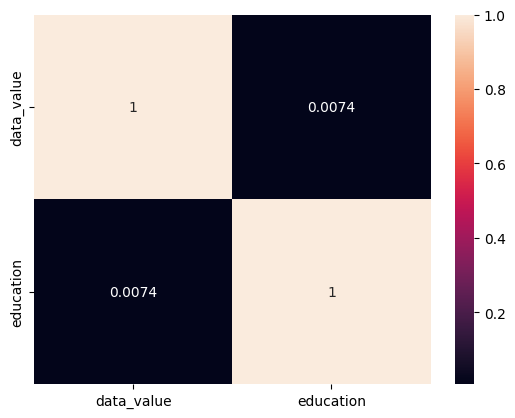

In [117]:
ax = sns.heatmap(data.corr(), annot=True)

In [118]:
missing_percentage = data.isnull().sum() * 100 / len(data)
missing_percentage

locationabbr                  0.000000
locationdesc                  0.000000
datasource                    0.000000
class                         0.000000
topic                         0.000000
question                      0.000000
data_value_type               0.000000
data_value                    9.450854
age(years)                   78.577315
education                     0.000000
income                       74.998127
race/ethnicity               71.426431
geolocation                   1.887923
classid                       0.000000
topicid                       0.000000
questionid                    0.000000
datavaluetypeid               0.000000
stratificationcategory1       0.000000
stratification1               0.000000
stratificationcategoryid1     0.000000
stratificationid1             0.000000
dtype: float64

In [ ]:
data.dtypes

yearstart           int64
locationabbr       object
locationdesc       object
data_value        float64
sample_size       float64
age(years)         object
education          object
income             object
race/ethnicity     object
locationid          int64
dtype: object

In [ ]:
data.dropna(subset=['data_value'], inplace=True)

In [ ]:
missing_percentage = data.isnull().sum() * 100 / len(data)
missing_percentage

yearstart          0.000000
locationabbr       0.000000
locationdesc       0.000000
data_value         0.000000
sample_size        0.000000
age(years)        76.341373
education         84.222066
income            72.388615
race/ethnicity    78.881397
locationid         0.000000
dtype: float64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.isna()

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
0,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,True,True,True,True,False
2,False,False,False,False,False,True,True,True,True,False
3,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
53382,False,False,False,False,False,True,True,False,True,False
53383,False,False,False,False,False,True,True,False,True,False
53384,False,False,False,False,False,True,True,True,False,False
53385,False,False,False,False,False,True,True,True,False,False


In [ ]:
df=data.copy()

##4.5 removing outliers

In [ ]:
#creating function to remove outliers by using interquartile function
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [ ]:
remove_outliers(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1
5,2011,AL,Alabama,33.8,1925.0,NaN,Some college or technical school,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
53382,2016,VI,Virgin Islands,13.3,212.0,NaN,NaN,"$75,000 or greater",NaN,78
53383,2016,VI,Virgin Islands,25.3,137.0,NaN,NaN,Data not reported,NaN,78
53384,2016,VI,Virgin Islands,18.3,154.0,NaN,NaN,NaN,Non-Hispanic White,78
53385,2016,VI,Virgin Islands,24.1,820.0,NaN,NaN,NaN,Non-Hispanic Black,78


In [ ]:
df.shape

(42801, 10)

#5. Preprocessing

##5.1 Standardizing the text in the data

In [ ]:
#Creating a function for standardizing the string data by lowering all the letters
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

In [ ]:
standardize_text(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
1,2011,al,alabama,32.3,2581.0,NaN,NaN,NaN,NaN,1
2,2011,al,alabama,31.8,4723.0,NaN,NaN,NaN,NaN,1
3,2011,al,alabama,33.6,1153.0,NaN,less than high school,NaN,NaN,1
4,2011,al,alabama,32.8,2402.0,NaN,high school graduate,NaN,NaN,1
5,2011,al,alabama,33.8,1925.0,NaN,some college or technical school,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
53382,2016,vi,virgin islands,13.3,212.0,NaN,NaN,"$75,000 or greater",NaN,78
53383,2016,vi,virgin islands,25.3,137.0,NaN,NaN,data not reported,NaN,78
53384,2016,vi,virgin islands,18.3,154.0,NaN,NaN,NaN,non-hispanic white,78
53385,2016,vi,virgin islands,24.1,820.0,NaN,NaN,NaN,non-hispanic black,78


##5.2 Data split for numerical and categorical variables

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical = df[numerical_columns]

In [ ]:
numerical = numerical.fillna(numerical.mean())
numerical

,yearstart,data_value,sample_size,locationid
1,2011,32.3,2581.0,1
2,2011,31.8,4723.0,1
3,2011,33.6,1153.0,1
4,2011,32.8,2402.0,1
5,2011,33.8,1925.0,1
...,...,...,...,...
53382,2016,13.3,212.0,78
53383,2016,25.3,137.0,78
53384,2016,18.3,154.0,78
53385,2016,24.1,820.0,78


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical = df[categorical_columns]

In [ ]:
categorical

,locationabbr,locationdesc,age(years),education,income,race/ethnicity
1,al,alabama,NaN,NaN,NaN,NaN
2,al,alabama,NaN,NaN,NaN,NaN
3,al,alabama,NaN,less than high school,NaN,NaN
4,al,alabama,NaN,high school graduate,NaN,NaN
5,al,alabama,NaN,some college or technical school,NaN,NaN
...,...,...,...,...,...,...
53382,vi,virgin islands,NaN,NaN,"$75,000 or greater",NaN
53383,vi,virgin islands,NaN,NaN,data not reported,NaN
53384,vi,virgin islands,NaN,NaN,NaN,non-hispanic white
53385,vi,virgin islands,NaN,NaN,NaN,non-hispanic black


##5.3 One-Hot Encoding for Categorical variables

In [ ]:
categorical.columns

Index(['locationabbr', 'locationdesc', 'age(years)', 'education', 'income',
       'race/ethnicity'],
      dtype='object')

In [ ]:
#income
in_map = {'less than $15,000':0, '$15,000 - $24,999':1, '$25,000 - $34,999':2,'$35,000 - $49,999':3, '$50,000 - $74,999':4,
          '$75,000 or greater':5, 'data not reported':6}
in_map
df['income'] = df['income'].map(in_map)

In [ ]:
#education
ed_map = {'less than high school': 0, 'high school graduate':1, 'some college or technical school':2,'college graduate':3}
ed_map
df['education'] = df['education'].map(ed_map)

In [ ]:
#race/ethnicity
rc_map = {'non-hispanic white': 0, 'non-hispanic black':1, 'hispanic':2,'asian':3, 'hawaiian/pacific islander':4,
       'american indian/alaska native':5, '2 or more races':6, 'other':7}
rc_map
df['race/ethnicity'] = df['race/ethnicity'].map(rc_map)

In [ ]:
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
1,2011,al,alabama,32.3,2581.0,NaN,NaN,NaN,NaN,1
2,2011,al,alabama,31.8,4723.0,NaN,NaN,NaN,NaN,1
3,2011,al,alabama,33.6,1153.0,NaN,0.0,NaN,NaN,1
4,2011,al,alabama,32.8,2402.0,NaN,1.0,NaN,NaN,1
5,2011,al,alabama,33.8,1925.0,NaN,2.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
53382,2016,vi,virgin islands,13.3,212.0,NaN,NaN,NaN,NaN,78
53383,2016,vi,virgin islands,25.3,137.0,NaN,NaN,NaN,NaN,78
53384,2016,vi,virgin islands,18.3,154.0,NaN,NaN,NaN,NaN,78
53385,2016,vi,virgin islands,24.1,820.0,NaN,NaN,NaN,NaN,78


##Dropping categorical columns as they contain large amount of null values so we use numerical columns only.

In [ ]:
df=numerical.copy()

In [ ]:
df

,yearstart,data_value,sample_size,locationid
1,2011,32.3,2581.0,1
2,2011,31.8,4723.0,1
3,2011,33.6,1153.0,1
4,2011,32.8,2402.0,1
5,2011,33.8,1925.0,1
...,...,...,...,...
53382,2016,13.3,212.0,78
53383,2016,25.3,137.0,78
53384,2016,18.3,154.0,78
53385,2016,24.1,820.0,78


#5 EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

##1. Plotting distributions for numerical data

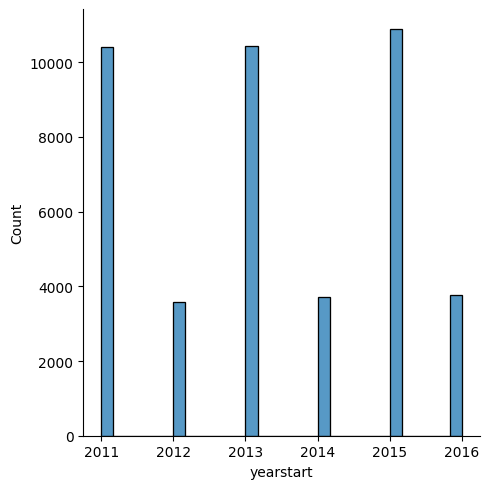

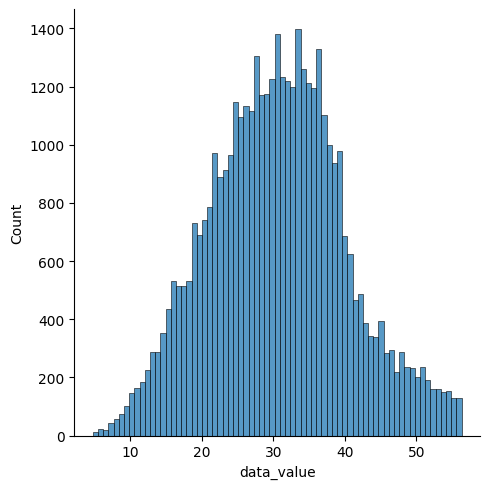

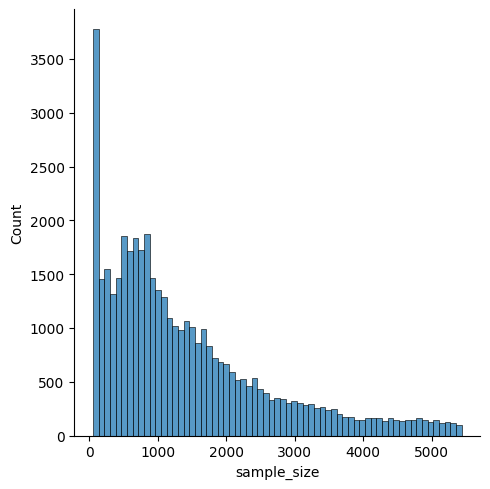

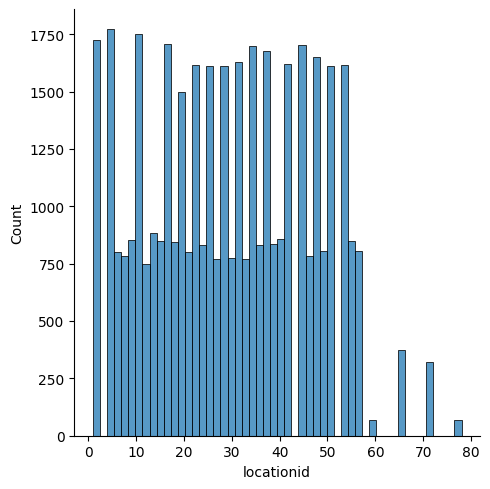

In [ ]:
for col in df:
    sns.displot(df[col])
    plt.show()

**Observation**

##2. Plotting histograms

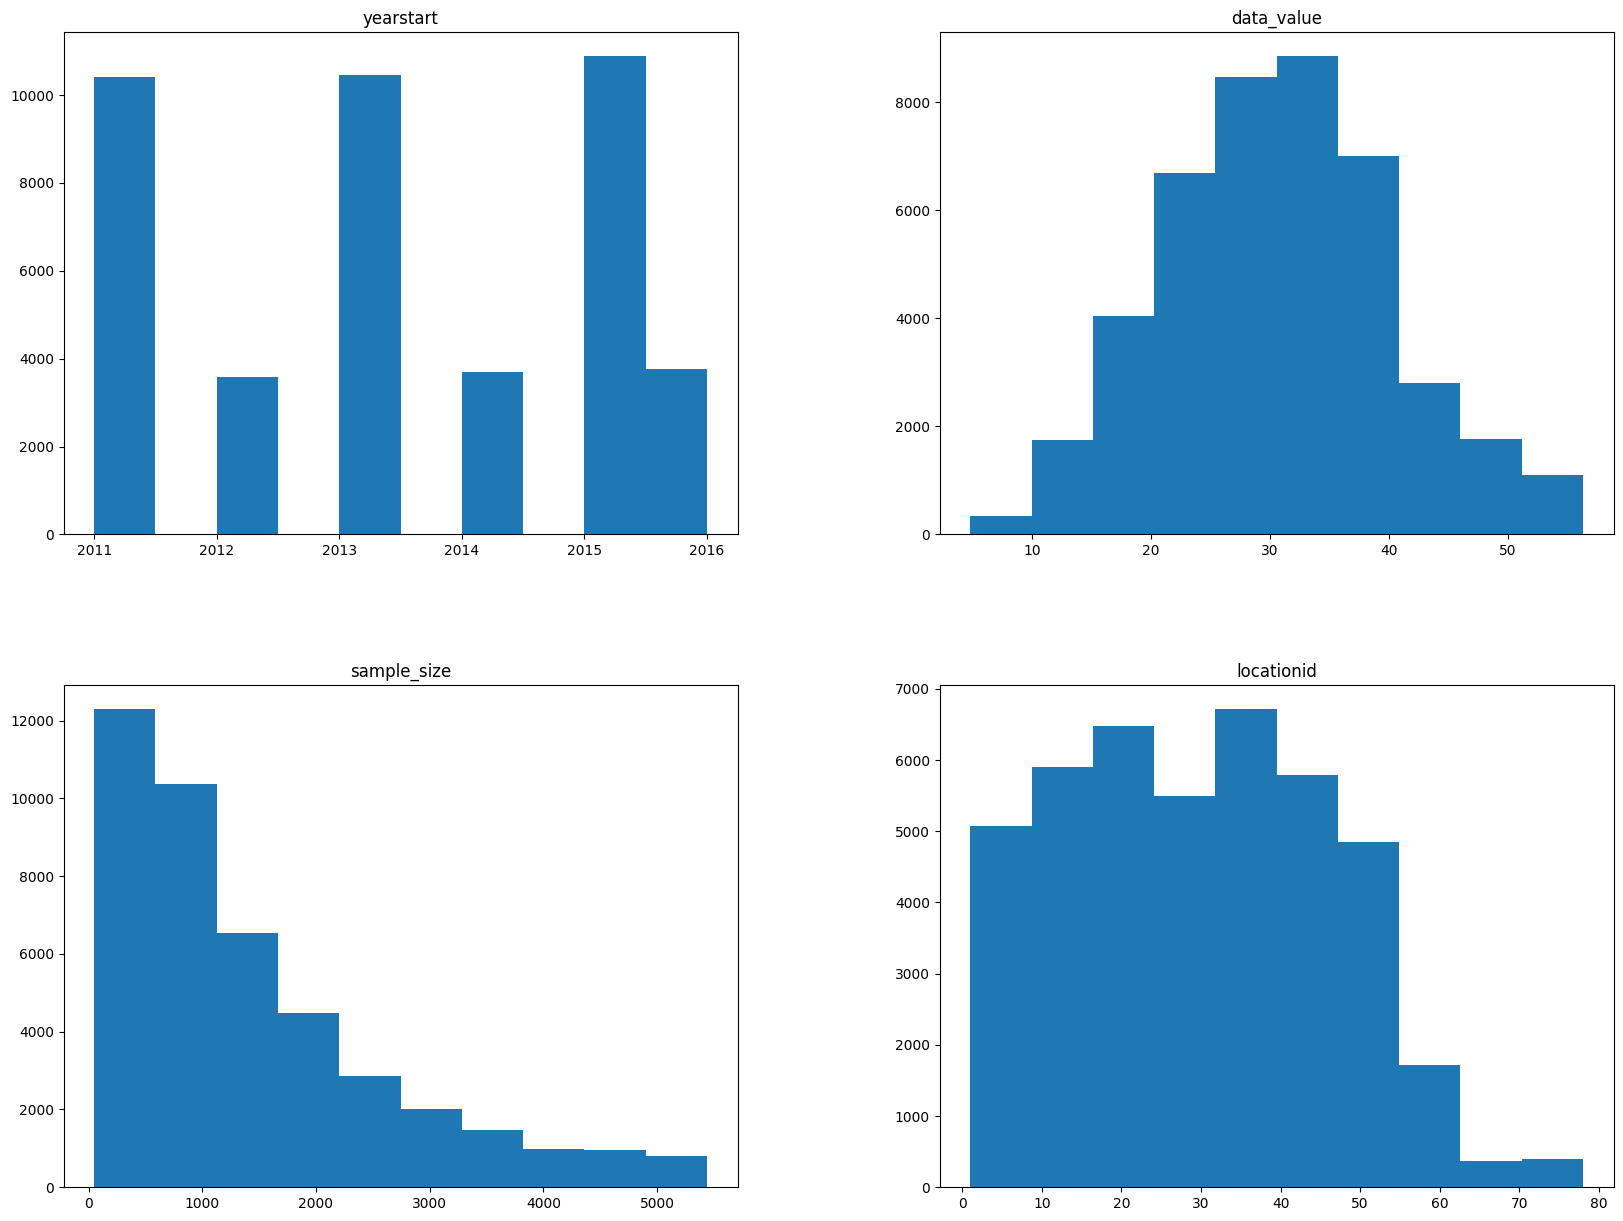

In [ ]:
df.hist(figsize=(20,15), grid=False)
plt.show()

**Observation**

##3. Plottling relationship between numerical variables.

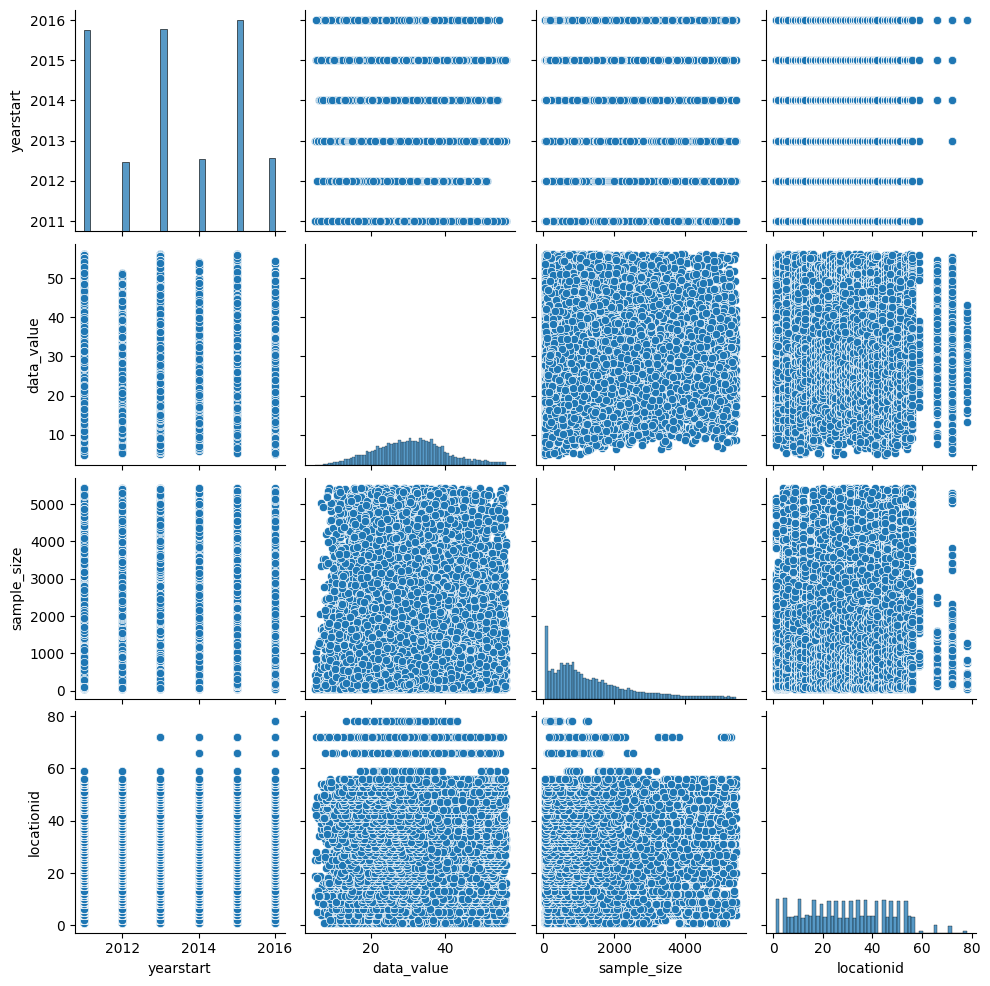

In [ ]:
sns.pairplot(df)

**Observation**

##4. Correlation Analysis

In [ ]:
df.corr()

,yearstart,data_value,sample_size,locationid
yearstart,1.000000,0.004740,-0.042780,0.044513
data_value,0.004740,1.000000,-0.023107,0.000893
sample_size,-0.042780,-0.023107,1.000000,-0.001637
locationid,0.044513,0.000893,-0.001637,1.000000


<Axes: >

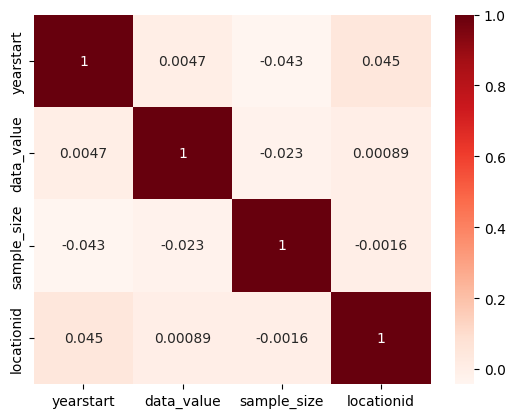

In [ ]:
corr = df.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap='Reds')